# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import time
from lightkurve import TessLightCurve
import matplotlib.pyplot as plt
%matplotlib inline

import triceratops.triceratops as tr

# User Inputs

* **ID** = TIC ID of selected target  
* **sectors** = Observational sector of TESS  


* **period** = Orbital Period  
* **tdepth** = Transit Depth  


* **lc** = Light curve file  
* **contrastcurve_file** = Contrast curve file  


* **band** = Band of filter through which CC file was created. (TESS, Vis, J, H, K)  
From table below we can identify which band to choose.  

|   Wavelength   | Central Wavelength | Filter |
|:--------------:|:------------------:|:------:|
|  600 - 1000 nm | 786.5 nm           |  TESS  |
|   400 - 800 nm | 550 nm             |   Vis  |
| 1000 - 1500 nm | 1250 nm            |   J    |
| 1400 - 2000 nm | 1650 nm            |   H    |
| 1800 - 2600 nm | 2200 nm            |   K    |

* We usually encounter with following wavelengths,  
 - **562 nm** : Vis filter  
 - **832 nm** : TESS filter  
 - **Br-Gamma** (2172 - 2202 nm) : K filter
 - **Jcont** (1190 - 1230 nm) : J filter

In [2]:
ID = 67630845
sectors = np.array([30])

period = 9.4648533626
tdepth = 0.005055806646143898

lc = pd.read_csv("TOI_2408_30.csv", header=None)

# Downloading & Visualizing Data

In [3]:
target = tr.target(ID=ID, sectors=sectors)

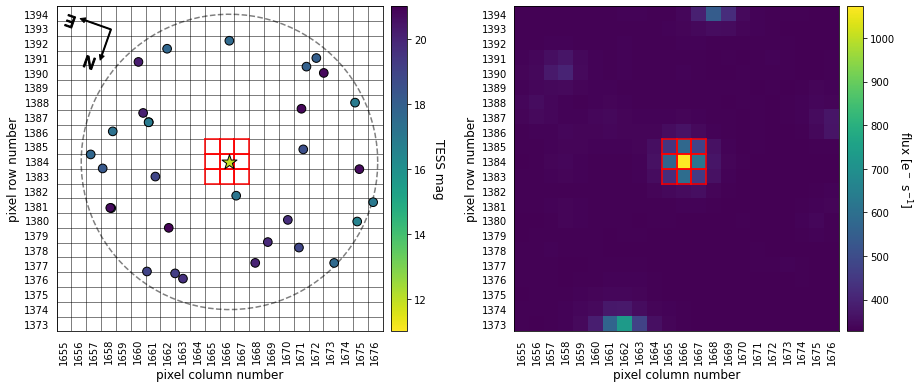

,ID,Tmag,Jmag,Hmag,Kmag,ra,dec,mass,rad,Teff,plx,sep (arcsec),PA (E of N)
0,67630845,11.9205,11.051,10.602,10.481,18.241868,-32.966020,0.810000,0.748450,4935.0,5.338120,0.000,0.000
1,67630848,17.1094,15.742,15.343,14.833,18.233822,-32.954637,0.620000,0.737354,4002.0,0.765178,47.642,329.328
2,616616642,18.5836,NaN,NaN,NaN,18.212987,-32.980569,NaN,NaN,3627.0,1.281460,101.743,239.008
3,67630850,18.8970,16.954,16.153,15.487,18.270526,-32.950663,NaN,NaN,3575.0,1.249280,102.715,57.444
4,616616651,19.6898,NaN,NaN,NaN,18.208514,-32.952814,NaN,NaN,NaN,3.704000,111.402,295.254
5,10000326501,16.6600,14.910,14.130,13.710,18.281708,-32.969570,NaN,NaN,NaN,NaN,121.007,96.073
6,67630843,16.9270,15.928,15.127,14.255,18.281770,-32.969486,NaN,NaN,NaN,NaN,121.162,95.922
7,616616653,19.8503,NaN,NaN,NaN,18.213439,-32.942035,NaN,NaN,NaN,0.380723,121.781,315.147
8,616616641,20.8164,NaN,NaN,NaN,18.220026,-32.995103,NaN,NaN,NaN,NaN,123.742,212.205
9,616616656,20.9025,NaN,NaN,NaN,18.256995,-32.933814,NaN,NaN,NaN,NaN,124.623,21.516


In [4]:
ap = np.array([[1665, 1383], [1666, 1383], [1667, 1383], [1665, 1384], [1666, 1384],
               [1667, 1384], [1665, 1385], [1666, 1385], [1667, 1385]])

target.plot_field(sector = sectors[0], ap_pixels = ap)
 
target.stars

# Check Nearby Region

In [5]:
apertures = np.array([ap])
target.calc_depths(tdepth = tdepth, all_ap_pixels = apertures)

target.stars

,ID,Tmag,Jmag,Hmag,Kmag,ra,dec,mass,rad,Teff,plx,sep (arcsec),PA (E of N),fluxratio,tdepth
0,67630845,11.9205,11.051,10.602,10.481,18.241868,-32.966020,0.810000,0.748450,4935.0,5.338120,0.000,0.000,9.988789e-01,0.005061
1,67630848,17.1094,15.742,15.343,14.833,18.233822,-32.954637,0.620000,0.737354,4002.0,0.765178,47.642,329.328,1.121102e-03,0.000000
2,616616642,18.5836,NaN,NaN,NaN,18.212987,-32.980569,NaN,NaN,3627.0,1.281460,101.743,239.008,1.198044e-09,0.000000
3,67630850,18.8970,16.954,16.153,15.487,18.270526,-32.950663,NaN,NaN,3575.0,1.249280,102.715,57.444,5.690045e-09,0.000000
4,616616651,19.6898,NaN,NaN,NaN,18.208514,-32.952814,NaN,NaN,NaN,3.704000,111.402,295.254,1.213465e-10,0.000000
5,10000326501,16.6600,14.910,14.130,13.710,18.281708,-32.969570,NaN,NaN,NaN,NaN,121.007,96.073,1.978349e-10,0.000000
6,67630843,16.9270,15.928,15.127,14.255,18.281770,-32.969486,NaN,NaN,NaN,NaN,121.162,95.922,1.443373e-10,0.000000
7,616616653,19.8503,NaN,NaN,NaN,18.213439,-32.942035,NaN,NaN,NaN,0.380723,121.781,315.147,2.335535e-12,0.000000
8,616616641,20.8164,NaN,NaN,NaN,18.220026,-32.995103,NaN,NaN,NaN,NaN,123.742,212.205,1.217487e-12,0.000000
9,616616656,20.9025,NaN,NaN,NaN,18.256995,-32.933814,NaN,NaN,NaN,NaN,124.623,21.516,5.381522e-12,0.000000


# Calculating FPP & NFPP

In [6]:
%%time
for i in range(4):
    
    lc = pd.read_csv("TOI_2408_30.csv", header=None)
    
    # read in the light curve
    time, flux, flux_err = lc[0].values, lc[1].values, lc[2].values
    P_orb = period

    #lc_binsize = (time.max()-time.min())/100
    lc = TessLightCurve(time=time, flux=flux, flux_err=flux_err)#.bin(time_bin_size=lc_binsize)

    target.calc_probs(time = lc.time.value, 
                      flux_0 = lc.flux.value, 
                      flux_err_0 = np.mean(lc.flux_err.value), 
                      P_orb = P_orb,
                      exptime = 0.0013888888888889)
    
    df_results = target.probs
    print("FPP = ", target.FPP)
    print("NFPP = ", target.NFPP)
    print("")

Calculating TP scenario probabilitiey for 67630845.
Calculating EB and EBx2P scenario probabilities for 67630845.
Calculating PTP scenario probability for 67630845.
Calculating PEB and PEBx2P scenario probabilities for 67630845.
Calculating STP scenario probability for 67630845.
Calculating SEB and SEBx2P scenario probabilities for 67630845.
Calculating DTP scenario probability for 67630845.


<timed exec>:12: DtypeWarning: Columns (0,1,2) have mixed types.Specify dtype option on import or set low_memory=False.


Calculating DEB and DEBx2P scenario probabilities for 67630845.
Calculating BTP scenario probability for 67630845.
Calculating BEB and BEBx2P scenario probabilities for 67630845.
FPP =  0.19428248365792933
NFPP =  0.0

Calculating TP scenario probabilitiey for 67630845.
Calculating EB and EBx2P scenario probabilities for 67630845.
Calculating PTP scenario probability for 67630845.
Calculating PEB and PEBx2P scenario probabilities for 67630845.
Calculating STP scenario probability for 67630845.
Calculating SEB and SEBx2P scenario probabilities for 67630845.
Calculating DTP scenario probability for 67630845.


<timed exec>:12: DtypeWarning: Columns (0,1,2) have mixed types.Specify dtype option on import or set low_memory=False.


Calculating DEB and DEBx2P scenario probabilities for 67630845.
Calculating BTP scenario probability for 67630845.
Calculating BEB and BEBx2P scenario probabilities for 67630845.
FPP =  0.16545143379392546
NFPP =  0.0

Calculating TP scenario probabilitiey for 67630845.
Calculating EB and EBx2P scenario probabilities for 67630845.
Calculating PTP scenario probability for 67630845.
Calculating PEB and PEBx2P scenario probabilities for 67630845.
Calculating STP scenario probability for 67630845.
Calculating SEB and SEBx2P scenario probabilities for 67630845.
Calculating DTP scenario probability for 67630845.


<timed exec>:12: DtypeWarning: Columns (0,1,2) have mixed types.Specify dtype option on import or set low_memory=False.


Calculating DEB and DEBx2P scenario probabilities for 67630845.
Calculating BTP scenario probability for 67630845.
Calculating BEB and BEBx2P scenario probabilities for 67630845.
FPP =  0.18477846238682982
NFPP =  0.0

Calculating TP scenario probabilitiey for 67630845.
Calculating EB and EBx2P scenario probabilities for 67630845.
Calculating PTP scenario probability for 67630845.
Calculating PEB and PEBx2P scenario probabilities for 67630845.
Calculating STP scenario probability for 67630845.
Calculating SEB and SEBx2P scenario probabilities for 67630845.
Calculating DTP scenario probability for 67630845.


<timed exec>:12: DtypeWarning: Columns (0,1,2) have mixed types.Specify dtype option on import or set low_memory=False.


Calculating DEB and DEBx2P scenario probabilities for 67630845.
Calculating BTP scenario probability for 67630845.
Calculating BEB and BEBx2P scenario probabilities for 67630845.
FPP =  0.21873232089329586
NFPP =  0.0

Wall time: 1h 26min 58s


In [7]:
df_results = target.probs
print("FPP = ", target.FPP)
print("NFPP = ", target.NFPP)
df_results

FPP =  0.21873232089329586
NFPP =  0.0


,ID,scenario,M_s,R_s,P_orb,inc,b,ecc,w,R_p,M_EB,R_EB,prob
0,67630845,TP,0.810000,0.748450,9.464853,88.808568,0.634146,0.302582,265.021464,5.372201,0.000000,0.000000,3.914683e-01
1,67630845,EB,0.810000,0.748450,9.464853,88.490538,0.402609,0.662665,189.105328,0.000000,0.101414,0.122024,6.137731e-04
2,67630845,EBx2P,0.810000,0.748450,18.929707,88.008103,1.943253,0.433155,227.450151,0.000000,0.805405,0.748450,5.773393e-10
3,67630845,PTP,0.810000,0.748450,9.464853,89.185202,0.314030,0.105839,28.249803,5.390364,0.000000,0.000000,1.107668e-01
4,67630845,PEB,0.810000,0.748450,9.464853,88.097709,0.618237,0.398370,162.394919,0.000000,0.148420,0.179896,1.222975e-18
5,67630845,PEBx2P,0.810000,0.748450,18.929707,88.511966,0.892624,0.581642,189.773047,0.000000,0.801248,0.748450,3.845580e-05
6,67630845,STP,0.654075,0.678362,9.464853,89.622401,0.172565,0.124020,310.747880,9.569442,0.000000,0.000000,1.814599e-01
7,67630845,SEB,0.598628,0.595525,9.464853,89.626247,0.180407,0.003228,67.804532,0.000000,0.076588,0.100000,3.431727e-02
8,67630845,SEBx2P,0.260742,0.284067,18.929707,89.108352,1.415437,0.724533,230.474090,0.000000,0.256487,0.280356,3.422829e-04
9,67630845,DTP,0.810000,0.748450,9.464853,88.644528,0.542598,0.028485,130.721567,5.439077,0.000000,0.000000,2.790326e-01


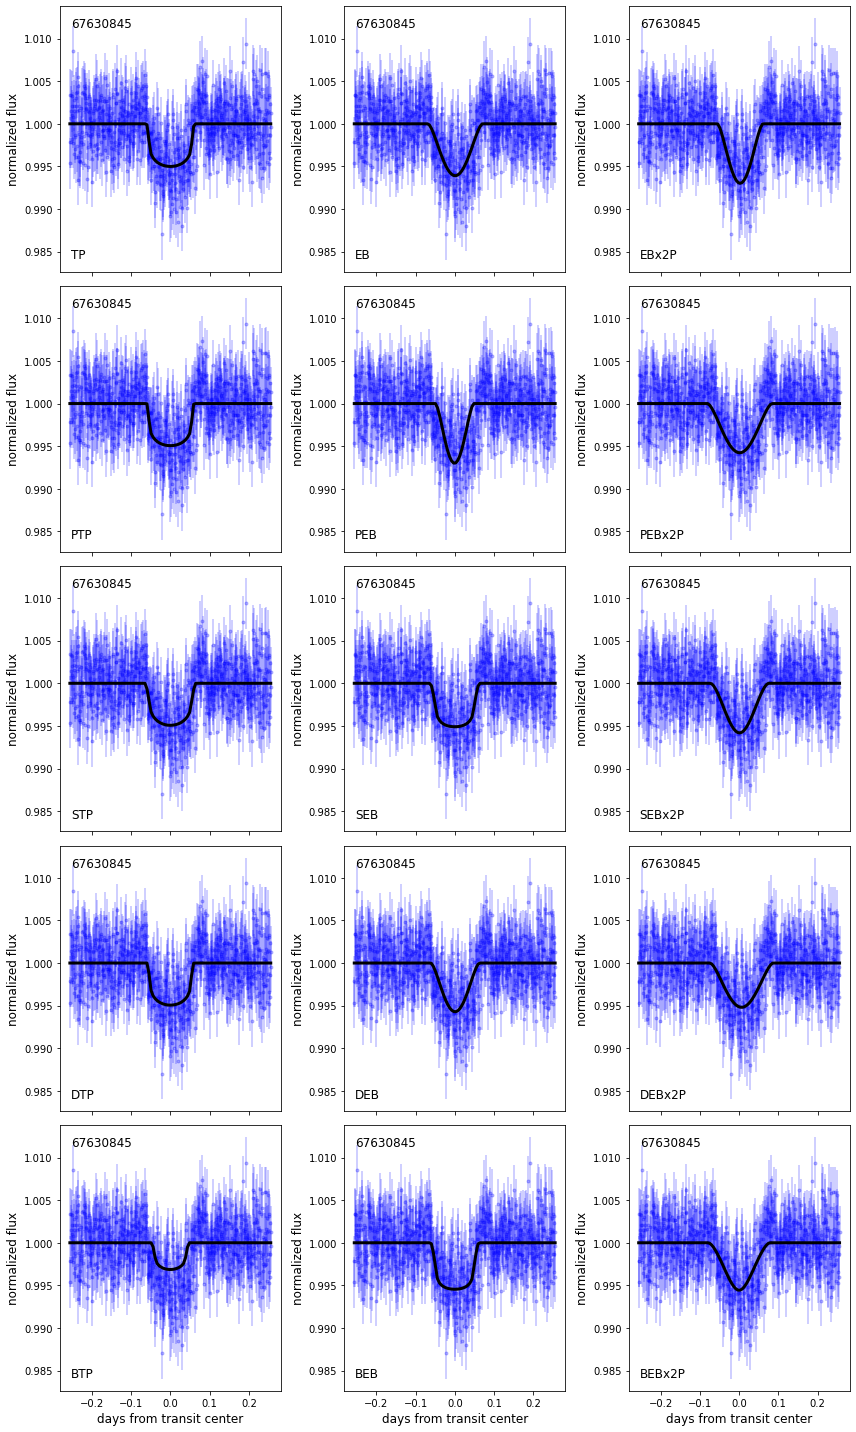

In [8]:
target.plot_fits(time=time, flux_0=flux, flux_err_0=np.mean(flux_err))

# Output

## Sector 30

In [9]:
# Sector 30
FPP_30 = [0.14496332947819068, 0.15444312608351662, 0.17299560084875676, 0.15642819264555008,
          0.21232288228962815, 0.229495669078581, 0.18321974969089616, 0.16285614058914677,
          0.16569078600029086, 0.11372729673425974, 0.16812093412314422, 0.19428248365792933,
          0.16545143379392546, 0.18477846238682982, 0.21873232089329586]

NFPP_30 = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

print("Sector 24")
print("   FPP  = ",np.mean(FPP_30),"+/-",np.std(FPP_30))
print("   NFPP = ",np.mean(NFPP_30),"+/-",np.std(NFPP_30))

Sector 24
   FPP  =  0.1751672272195961 +/- 0.028994896788542782
   NFPP =  0.0 +/- 0.0
